### Monte Carlo Simulation with Python

Notebook to accompany article on [Practical Business Python](https://pbpython.com/monte-carlo.html)

Update to use numpy for faster loops based on comments [here](https://www.reddit.com/r/Python/comments/arxwkm/monte_carlo_simulation_with_python/)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
# Define the variables for the Percent to target based on historical results
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 100000

In [4]:
# Show an example of calculating the percent to target
pct_to_target = np.random.normal(
    avg,
    std_dev,
    size=(num_reps, num_simulations)
)

In [5]:
pct_to_target[0:10]

array([[1.09238904, 1.01932827, 0.94120189, ..., 0.85886042, 1.03453806,
        1.1392979 ],
       [1.09034063, 0.90533523, 1.02029866, ..., 1.17277417, 0.9580318 ,
        1.12521634],
       [1.04227261, 1.03317134, 1.02434032, ..., 0.93665842, 0.94956277,
        1.07742996],
       ...,
       [0.95988368, 0.8530994 , 1.03881063, ..., 1.00487983, 1.02720799,
        0.89022387],
       [1.05298563, 0.99115057, 1.06661409, ..., 1.02240601, 1.00018205,
        0.98031275],
       [0.88412177, 0.9665776 , 1.0092386 , ..., 0.9069835 , 1.01268334,
        1.03127651]])

In [6]:
# Another example for the sales target distribution
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, p=sales_target_prob, 
                                size=(num_reps, num_simulations))

In [7]:
sales_target[0:10]

array([[400000, 200000,  75000, ..., 100000, 100000,  75000],
       [100000,  75000,  75000, ...,  75000,  75000,  75000],
       [200000, 400000, 300000, ...,  75000,  75000, 200000],
       ...,
       [ 75000, 100000, 300000, ...,  75000, 100000, 100000],
       [100000,  75000, 200000, ...,  75000, 200000, 100000],
       [ 75000,  75000,  75000, ...,  75000, 100000, 200000]])

In [8]:
commission_percentages = np.take(
    np.array([0.04, 0.03, 0.02]),
    np.digitize(pct_to_target, bins=[.9, .99, 10])
)

In [9]:
pd.DataFrame(np.digitize(pct_to_target, bins=[.9, .99, 10]).flatten()).value_counts()

2    26995254
1    15069869
0     7934877
dtype: int64

In [10]:
# frequencies
pd.DataFrame(commission_percentages.flatten()).value_counts()

0.02    26995254
0.03    15069869
0.04     7934877
dtype: int64

In [11]:
commission_percentages[0:10]

array([[0.02, 0.02, 0.03, ..., 0.04, 0.02, 0.02],
       [0.02, 0.03, 0.02, ..., 0.02, 0.03, 0.02],
       [0.02, 0.02, 0.02, ..., 0.03, 0.03, 0.02],
       ...,
       [0.03, 0.04, 0.02, ..., 0.02, 0.02, 0.04],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.03],
       [0.04, 0.03, 0.02, ..., 0.03, 0.02, 0.02]])

In [12]:
total_commissions = (commission_percentages * sales_target).sum(axis=0)

In [13]:
total_commissions.std()

77462.56699164407

In [14]:
# Show how to create the dataframe
df = pd.DataFrame(data={'Total_Commissions': total_commissions})
df.head()

,Total_Commissions
0,2188750.0
1,2252500.0
2,2109500.0
3,2207750.0
4,2208750.0


<AxesSubplot:title={'center':'Commissions Distribution'}, ylabel='Frequency'>

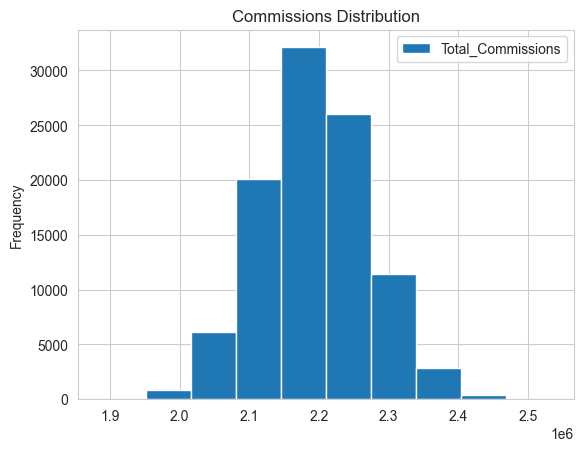

In [15]:
df.plot(kind='hist', title='Commissions Distribution')

In [16]:
df.describe()

,Total_Commissions
count,1.000000e+05
mean,2.193146e+06
std,7.746295e+04
min,1.886500e+06
25%,2.140250e+06
50%,2.192000e+06
75%,2.244750e+06
max,2.534000e+06
